In [35]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
df = pd.read_csv("Customer Order Analysis.csv", encoding='latin-1')

In [37]:
df.isnull().sum()

ORDERDATE              0
ORDERPRIOTORITY        0
ORDERQUANTITY          0
SALES                  0
DISCOUNT               0
SHIPMODE               0
PROFIT                 0
UNITPRICE              0
SHIPPINGCOSTS          0
CUSTOMERNAME           0
CUSTOMERSEGMENT        0
PRODUCTCATEGORY        0
PRODUCTSUBCATEGORY     0
PRODUCTNAME            0
PRODUCTCONTAINER       0
PRODUCTBASEMARGIN     63
SHIPDATE               0
DATASET                0
dtype: int64

In [38]:
df.dropna()

,ORDERDATE,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,UNITPRICE,SHIPPINGCOSTS,CUSTOMERNAME,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTSUBCATEGORY,PRODUCTNAME,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE,DATASET
0,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010,Superstore
1,10/1/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012,Superstore
2,10/1/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-DÂ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012,Superstore
3,7/10/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011,Superstore
4,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010,Superstore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,8/9/2010,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,150.98,66.27,Mick Brown,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,8/9/2010,Superstore
8395,8/9/2010,Medium,23,392.5700,0.04,Regular Air,22.25,17.07,8.13,Mick Brown,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,8/11/2010,Superstore
8396,4/8/2011,Not Specified,37,823.7800,0.03,Express Air,343.05,22.23,5.08,Frank Hawley,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,4/10/2011,Superstore
8397,4/8/2011,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,8.99,Frank Hawley,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,4/9/2011,Superstore


In [39]:
df.columns

Index(['ORDERDATE', 'ORDERPRIOTORITY', 'ORDERQUANTITY', 'SALES', 'DISCOUNT',
       'SHIPMODE', 'PROFIT', 'UNITPRICE', 'SHIPPINGCOSTS', 'CUSTOMERNAME',
       'CUSTOMERSEGMENT', 'PRODUCTCATEGORY', 'PRODUCTSUBCATEGORY',
       'PRODUCTNAME', 'PRODUCTCONTAINER', 'PRODUCTBASEMARGIN', 'SHIPDATE',
       'DATASET'],
      dtype='object')

In [46]:
df.drop(columns = 'ORDERDATE')

,ORDERPRIOTORITY,ORDERQUANTITY,SALES,DISCOUNT,SHIPMODE,PROFIT,UNITPRICE,SHIPPINGCOSTS,CUSTOMERNAME,CUSTOMERSEGMENT,PRODUCTCATEGORY,PRODUCTSUBCATEGORY,PRODUCTNAME,PRODUCTCONTAINER,PRODUCTBASEMARGIN,SHIPDATE,DATASET
2,High,27.0,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-DÂ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012,Superstore
4,Not Specified,19.0,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010,Superstore
5,Not Specified,21.0,146.6900,0.05,Regular Air,4.43,6.64,4.95,Carlos Soltero,Consumer,Furniture,Office Furnishings,G.E. Longer-Life Indoor Recessed Floodlight Bulbs,Small Pack,0.37,8/30/2010,Superstore
6,High,12.0,93.5400,0.03,Regular Air,-54.04,7.30,7.72,Carl Jackson,Corporate,Office Supplies,Binders and Binder Accessories,"Angle-D Binders with Locking Rings, Label Holders",Small Box,0.38,6/17/2011,Superstore
9,Low,44.0,228.4100,0.07,Regular Air,-226.36,4.98,8.33,Dorothy Badders,Home Office,Office Supplies,Paper,Xerox 198,Small Box,0.38,2/26/2010,Superstore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,Medium,49.0,1488.6600,0.00,Regular Air,385.37,29.34,7.87,Mick Brown,Consumer,Furniture,Office Furnishings,"Seth Thomas 14"" Putty-Colored Wall Clock",Small Box,0.54,9/17/2009,Superstore
8392,Low,34.0,1041.6600,0.02,Express Air,480.53,28.53,1.49,Harry Greene,Corporate,Office Supplies,Binders and Binder Accessories,Lock-Up Easel 'Spel-Binder',Small Box,0.38,7/16/2012,Superstore
8395,Medium,23.0,392.5700,0.04,Regular Air,22.25,17.07,8.13,Mick Brown,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,8/11/2010,Superstore
8396,Not Specified,37.0,823.7800,0.03,Express Air,343.05,22.23,5.08,Frank Hawley,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,4/10/2011,Superstore


In [40]:
# Iterate through columns and check if dtype is 'object'
for column in df.columns:
    if df[column].dtype == 'object':
        # If dtype is 'object', use pd.get_dummies() to create dummy columns
        df = pd.get_dummies(df, columns=[column])

In [41]:
def remove_outliers_iqr(df):
    """
    Remove outliers from numerical columns in a DataFrame using the Interquartile Range (IQR) method.
    
    Parameters:
        df (DataFrame): Input DataFrame.
    
    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    # Copy the input DataFrame to avoid modifying the original DataFrame
    df_cleaned = df.copy()
    
    # Counter to keep track of the number of data points removed
    num_removed = 0
    
    # Iterate over numerical columns
    for column in df_cleaned.select_dtypes(include='number').columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        q1 = df_cleaned[column].quantile(0.25)
        q3 = df_cleaned[column].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        iqr = q3 - q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Count outliers and replace with NaN
        outliers = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)
        num_removed += outliers.sum()
        df_cleaned.loc[outliers, column] = np.nan
    
    # Drop rows containing NaN values (outliers)
    df_cleaned = df_cleaned.dropna()
    
    # Print the number of data points removed
    print(f"Number of data points removed: {num_removed}")
    
    return df_cleaned

In [42]:
df = remove_outliers_iqr(df)

Number of data points removed: 4569


In [43]:
def build_linear_regression_model(data, target_column):
    """
    Build a linear regression model based on the input DataFrame and target column.
    
    Parameters:
        data (DataFrame): The input DataFrame.
        target_column (str): The name of the target column.
    
    Returns:
        dict: A dictionary containing train score, test score, mean squared error, model coefficients, and the scatter plot.
    """
    # Extract features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate train and test scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Calculate mean squared error
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    # Get model coefficients
    coefficients = model.coef_
    
    # Create dictionary to store results
    results = {
        'train_score': train_score,
        'test_score': test_score,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'coefficients': coefficients
    }
    
    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_test)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Plot the diagonal line
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()
    
    return results

In [44]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

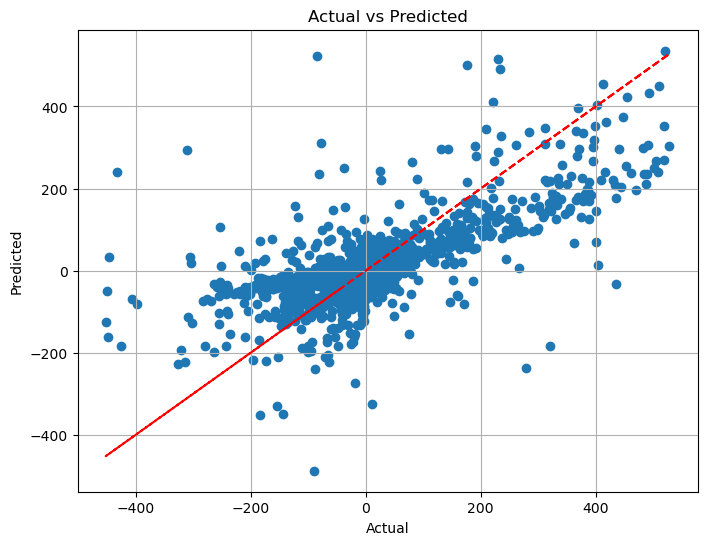

{'train_score': 0.5201480545481616,
 'test_score': 0.5007411215798636,
 'mse_train': 10685.17860848455,
 'mse_test': 11415.919105334116,
 'coefficients': array([-2.36076347e+00,  2.58497168e-01, -2.81174299e+02, -1.32967438e+00,
        -1.07366428e+01, -3.66939208e+02])}

In [45]:
build_linear_regression_model(numeric_df, "PROFIT")